In [1]:
import IPython
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import librosa as lib
from librosa import display
import seaborn as sns
sns.set_theme(style="whitegrid")

/tmp/ipykernel_4092/2598265789.py:16: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  time= lib.times_like(samples, sampling_rate)


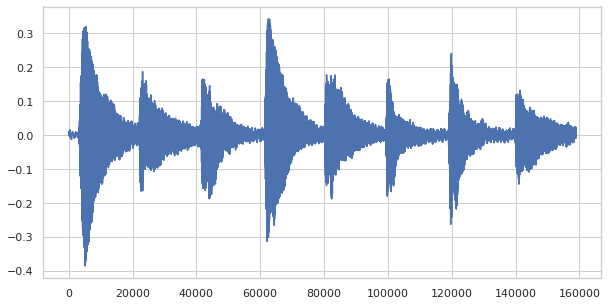

In [2]:
k='guitarra'
j=1
i=6
nombre = '/home/felipe/Documentos/tesis/datos_entrenamiento/do_mayor_piano'
sufijo = '.wav'
completo = nombre + sufijo
      
file_path = completo
      
samples, sampling_rate = lib.load(file_path)
      
duration_of_sound = len(samples)/sampling_rate
sr=sampling_rate


time= lib.times_like(samples, sampling_rate)
plt.figure(figsize=(10,5))
plt.plot(samples)



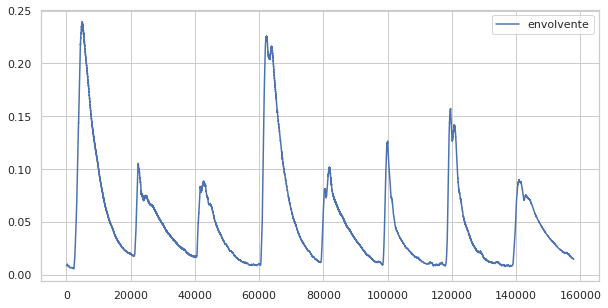

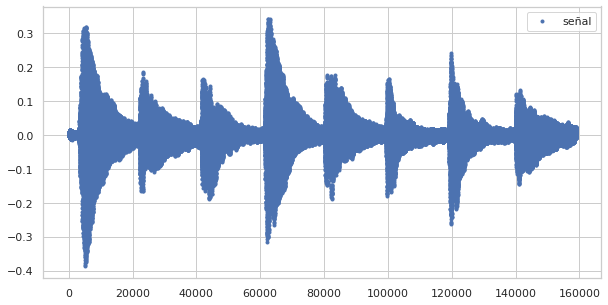

In [4]:
from scipy.signal import hilbert, chirp
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

signal = samples
analytic_signal= hilbert(signal)
#signal *= (1.0 + 0.5='rt(signal,N=None)
amplitude_envelope = np.abs(analytic_signal)

plt.figure(figsize=(10,5))
amplitude_envelope=moving_average(amplitude_envelope,1000)
plt.plot(amplitude_envelope,'-', label='envolvente')
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(samples,'.', label='señal')
plt.legend()
plt.show()

In [5]:
oenv = lib.onset.onset_strength(y=samples, sr=sampling_rate)
o_env=lib.onset.onset_detect(y=samples, sr=sampling_rate)
time_envelope= lib.times_like(samples, sampling_rate)
time_oenv= lib.times_like(oenv, sampling_rate)
time_o_env = lib.times_like(o_env, sampling_rate)
max_env=np.max(amplitude_envelope)
plt.figure(figsize=(10,5))
plt.vlines(o_env,ymin=0, ymax=max_env)
#plt.vlines(time_oenv[oenv], ymin=0, ymax=max_env, color='r', alpha=0.9,linestyle='--', label='Onsets')

plt.vlines(time_o_env[o_env], 0, max_env, color='r', alpha=0.9,linestyle='--', label='Onsets2')


#plt.vlines(time_oenv,ymin=0, ymax=max_env)
#plt.plot(time_envelope,amplitude_envelope,'-', label='envolvente')

#plt.xlim(23500,25000)
plt.legend()
plt.show()

/tmp/ipykernel_6337/3642324385.py:3: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  time_envelope= lib.times_like(samples, sampling_rate)
/tmp/ipykernel_6337/3642324385.py:4: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  time_oenv= lib.times_like(oenv, sampling_rate)
/tmp/ipykernel_6337/3642324385.py:5: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  time_o_env = lib.times_like(o_env, sampling_rate)


NameError: name 'amplitude_envelope' is not defined

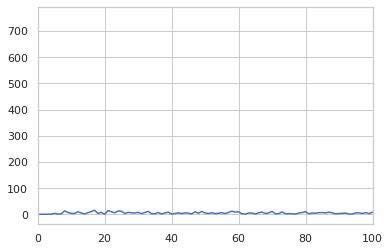

In [7]:
from scipy.fftpack import fft, dct, idct
from scipy.fft import fftfreq
y=fft(samples)
plt.plot(np.abs(y))
plt.xlim(0,100)

freq = fftfreq(8, 0.125)

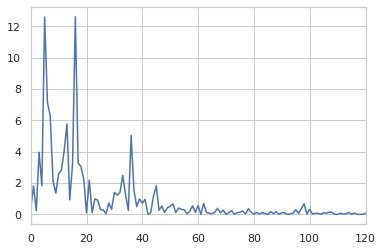

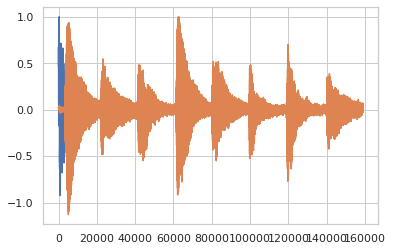

In [8]:
y2=dct(samples, type=2, n=3000)
plt.plot(np.abs(y2))
plt.xlim(0,120)

x2=idct(y2, type=2)
plt.figure()
plt.plot(x2/np.max(x2))
plt.plot(samples/np.max(samples))